In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as keras
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
from keras.optimizers import Adam, RMSprop
import pickle as pkl

c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorf

In [ ]:
## TEST FOR GPU AVAILABILITY

#tf.config.list_physical_devices('GPU')

#tf.test.is_gpu_available()

In [2]:
# LOAD DATA / IMAGES

game_ID = 'permanence'
prototype_length = 20

source_dir = '../data/env_imgs/'
save_dir = '../data/autoencoders/'

## import images
#data = np.load('../env_imgs/'+game_ID+'.npy')
data = np.array([np.load(source_dir+game_ID+'/npy/img_'+str(i)+'.npy') for i in np.arange(10000)])
#data = np.array([np.load('../dataset_autoe/npy/img_'+str(i)+'.npy') for i in np.arange(25000)])
#data = np.array([np.load('../dataset_autoe/npy/img_'+str(i)+'.npy') for i in np.arange(25000,50000)])
#data = np.array([np.load('../dataset_autoe/npy/img_'+str(i)+'.npy') for i in np.arange(50000,75000)])
#data = np.array([np.load('../dataset_autoe/npy/img_'+str(i)+'.npy') for i in np.arange(75000,99999)])
#data = np.array([np.load('../dataset_autoe/npy/img_'+str(i)+'.npy') for i in np.arange(40000,65000)])

print(data.shape)

(10000, 84, 84, 3)


In [3]:
def build_model(img_shape=(84,84,3)):
    
    input_img = Input(shape=img_shape)
    filter_size = (3, 3)
    pooling_size = (2, 2)
    
    x = Conv2D(16, filter_size, activation='relu', padding='same')(input_img)
    x = MaxPooling2D(pooling_size, padding='same')(x)
    x = Conv2D(32, filter_size, activation='relu', padding='same')(x)
    x = MaxPooling2D(pooling_size, padding='same')(x)
    x = Conv2D(32, filter_size, activation='relu', padding='same')(x)
    x = MaxPooling2D(pooling_size, padding='same')(x)
    
    x = Flatten()(x)
    x = Dense(prototype_length, activation="relu")(x)
    x = Dense(11*11*32)(x)
    x = Reshape((11, 11, 32))(x)

    x = Conv2D(32, filter_size, activation='relu', padding='same')(x)
    x = UpSampling2D(pooling_size)(x)
    x = Conv2D(32, filter_size, activation='relu', padding='same')(x)
    x = UpSampling2D(pooling_size)(x)
    x = Conv2D(16, filter_size, activation='relu')(x)
    x = UpSampling2D(pooling_size)(x)
    x = Conv2D(3, filter_size, activation='relu', padding='same')(x)

    autoencoder = Model(input_img, x)
    
    optimizer = RMSprop(lr=0.001) #before 0.002
    autoencoder.compile(loss='mse', optimizer=optimizer)
    
    autoencoder.summary()
    
    return autoencoder

In [4]:
autoencoder = build_model()







Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 84, 84, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 84, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)      

In [5]:
model_load = False

if model_load:
    #filename = 'SpaceInvaders_20_AnimalAI_adri1.h5'
    filename = game_ID+'_'+str(prototype_length)+'_animalai_v1.h5'
    filepath = os.path.abspath(save_dir+filename)
    #filepath = os.path.abspath('./trained_autoencoders/ae_spaceinvaders_'+str(self.pl)+'.h5')
    print('filepath', filepath)
    if os.path.exists(filepath):
        print('Loading....')
        model.autoencoder = load_model(filepath)
        print('FILE '+str(filename)+' LOADED') 
    else:
        print('FILE DOES NOT EXIST')
        
#autoencoder = load_model('autoencoder_newdac20-4.h5')
#autoencoder = load_model('autoencoder_newdac15-4.h5')
#autoencoder = load_model('autoencoder_newdac10-4.h5')

In [6]:
history = autoencoder.fit(data, data, epochs=50, batch_size=64)
#history = model.fit(sample, sample, epochs=8000, batch_size=16)



Epoch 1/50
10000/10000 [==============================] - 108s 11ms/step - loss: 0.0417
Epoch 2/50
10000/10000 [==============================] - 111s 11ms/step - loss: 0.0127
Epoch 3/50
10000/10000 [==============================] - 97s 10ms/step - loss: 0.0072
Epoch 4/50
10000/10000 [==============================] - 97s 10ms/step - loss: 0.0053
Epoch 5/50
10000/10000 [==============================] - 97s 10ms/step - loss: 0.0045
Epoch 6/50
10000/10000 [==============================] - 97s 10ms/step - loss: 0.0040
Epoch 7/50
10000/10000 [==============================] - 97s 10ms/step - loss: 0.0037
Epoch 8/50
10000/10000 [==============================] - 96s 10ms/step - loss: 0.0035
Epoch 9/50
10000/10000 [==============================] - 100s 10ms/step - loss: 0.0033
Epoch 10/50
10000/10000 [==============================] - 107s 11ms/step - loss: 0.0032
Epoch 11/50
10000/10000 [==============================] - 99s 10ms/step - loss: 0.0032
Epoch 12/50
10000/10000 [==========

In [10]:
# detour loss: 0.0016
# cylinder loss: 0.0021
# permanence loss: 0.001

In [7]:
#autoencoder.save('autoencoder_newdac10-5.h5')
autoencoder.save(save_dir+game_ID+'_'+str(prototype_length)+'-v1.h5')

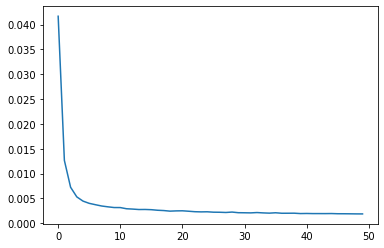

In [8]:
plt.plot(history.history['loss'])

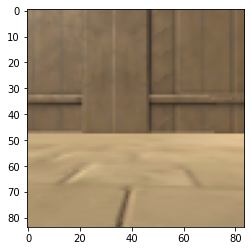

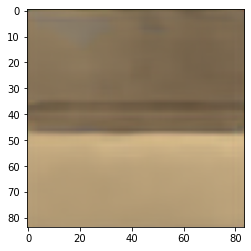

In [9]:
indx = 25

plt.imshow(data[indx])
plt.show()

plt.imshow(autoencoder.predict([[data[indx]]])[0])
plt.show()